# PROGRAMMING ASSIGNMENT 1 - DMITRY KALIKA
## Importing necessary modules

Modules that I wrote (and didn't write) are first imported. I wrote 'inversion_count' to count inversions, 'merge_sort' to perform merge sort and count the number of operations, and 'selection' to select the lower median efficiently and count the number of operations. All other modules were used for analysis, but not actually used to compute sort or compute the medians.

In [85]:
#Import Modules
import inversion_count as inv_c  # My inversion counter module
from random import random  # To generate random numbers
from random import randrange  # To generate random numbers
from random import shuffle  # Used in inversion experiment to shuffle the array subsets
import numpy as np  # Only used to generate a linearly spaced array for various N's in simulation
import merge_sort  # My merge sort module
import selection  # My select module
import statistics as stats  # Statistics module to verify median
import matplotlib.pyplot as plt  # Plotting module
import matplotlib.style as sty  # More for plotting module
import math  # For log function
from tqdm import tqdm  # Progress bar tool
sty.use("fivethirtyeight")  # Use five-thirty-eight blog figure style
%matplotlib inline  

# Merge Sort and Select Example

First, I will show an example of merge-sort and select in action. A random array of size N = 10000 was generated, sorted using merge-sort, and then the lower median was computed directly from the sorted array. The lower median was also computed using the select algorithm. The lower medians computed directly from merge-sort, the select algorithm, and the statistics toolbox (not written by me) were computed and compared; the number of operations between the two algorithms written by me were compared.

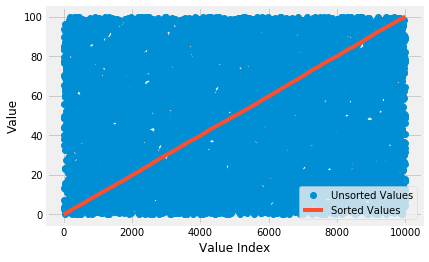

In [2]:
n = 10000
maxV = 100  #Max range of random number
rand_array = [maxV*random() for p in range(0, n)]
plt.plot(rand_array,marker="o",linestyle="None");
plt.plot(merge_sort.sort(rand_array));
plt.legend(["Unsorted Values","Sorted Values"],loc='lower right');
plt.xlabel("Value Index");
plt.ylabel("Value");

In [3]:
sorted_array,merge_sort_ops = merge_sort.sort(rand_array,out_ops = True)  #Do merge sort

print("Median from Merge Sort: " + repr(sorted_array[math.ceil(len(sorted_array)/2)-1]))
print("Number of operations for Merge Sort: "+repr(merge_sort_ops))
print("")
select_median,select_ops = selection.select(rand_array,out_ops = True)
print("Median from Select: " + repr(select_median))
print("Number of operations for Select: "+repr(select_ops))
print("")
print("Median from python built-in statistics module: ",repr(stats.median_low(rand_array)))

Median from Merge Sort: 49.83457523612381
Number of operations for Merge Sort: 120460

Median from Select: 49.83457523612381
Number of operations for Select: 35223

Median from python built-in statistics module:  49.83457523612381


## Discussion
All algorithms compute the same lower median! The number of operations required by the select algorithm is significantly fewer than performing the entire merge-sort!

These results are on par with what was expected, however, we still need to validate that merge-sort is sorting accurately, and both merge-sort and select algorithms are computing the lower median. 


## Algorithm Verification
To verify that the algorithms are working as expected, the merge-sort algorithm and select algorithm are tested on arrays of various sizes. Merge-sort is first validated by making sure that every preceding value is less than the next value. Then, if merge-sort is validated, computing the lower median directly is guaranteed to give us the correct lower median - this lower median is then used to validate the lower median computed by select.


In [54]:
max_array_size = 1000  # Max array size
max_value_size = 100  # Max value of an element in the array
n_test = 10000  # Runs
array_size = [math.ceil(max_array_size*random()) for p in range(0, n_test)]  # randomly select size of arrays

sorted_fail = 0  # Initialize with 0 sorted failures
median_fail = 0  # Initialize with 0 median failures

for c_array_size in array_size:
    rand_array = [max_value_size*random() for p in range(0, c_array_size)]  # Generate array of random size
    
    merge_sorted = merge_sort.sort(rand_array,out_ops = False)  # Do merge sort
    select_median = selection.select(rand_array,out_ops = False)  # Do select
   
    rand_array.sort()  # Do built in sort
    if not (merge_sorted == rand_array):  # Count the number of times sort failed
        sorted_fail += 1  # Add 1 if sorting failed
    
    if not (merge_sorted[math.ceil(len(merge_sorted)/2)-1]==select_median):
        median_fail +=1  # Add 1 if lower median calculation failed



In [60]:
print("Sorting Failed: " + repr(sorted_fail) + " times")
print("Median Failed: " + repr(median_fail) + " times")

Sorting Failed: 0 times
Median Failed: 0 times



## Discussion

The results above shows that all 10,000 randomly generated arrays were correctly sorted, and all merge-sort lower medians match that of the select algorithm. This gives us confidence that our merge-sort and select algorithms are doing exactly what we expect it to do.

# Algorithm Complexity Experiments

In order to get a good idea about the number of operations required to find the lower median as a function of N, we'll compute 100 medians (each from a random array) for N = 1:20:1000. For each N, we'll find the average number of operations required to compute the median using both the merge-sort and selection algorithms. We'll then plot a comparison.

In [25]:
nRuns = 10
N = np.linspace(1,100000,num=100,dtype='uint64')  # Linearly spaced array of size 100 from n = 1 to 100,000

merge_sort_avg_ops = []  # List to hold average ops as a function of N
select_avg_ops = []  # List to hold average ops as a function of N

for iN in tqdm(N):
    c_merge_ops = 0
    c_select_ops = 0
    for iRuns in range(1,nRuns+1):
        rand_array = [maxV*random() for p in range(0, iN)]  # Generate random array of size N
        _,merge_sort_ops = merge_sort.sort(rand_array,out_ops = True)  # Compute merge-sort operations
        _,select_ops = selection.select(rand_array,out_ops = True)  # Compute select operations
        c_merge_ops+=merge_sort_ops
        c_select_ops+=select_ops
    merge_sort_avg_ops.append(c_merge_ops/nRuns)  # Find average # of ops for merge-sort for array of size N
    select_avg_ops.append(c_select_ops/nRuns)  # Find average # of ops for select for array of size N





  0%|          | 0/100 [00:00<?, ?it/s]

  2%|▏         | 2/100 [00:00<00:05, 17.60it/s]

  3%|▎         | 3/100 [00:00<00:08, 12.05it/s]

  4%|▍         | 4/100 [00:00<00:12,  7.94it/s]

  5%|▌         | 5/100 [00:00<00:16,  5.67it/s]

  6%|▌         | 6/100 [00:01<00:22,  4.21it/s]

  7%|▋         | 7/100 [00:01<00:27,  3.37it/s]

  8%|▊         | 8/100 [00:02<00:33,  2.75it/s]

  9%|▉         | 9/100 [00:02<00:39,  2.33it/s]

 10%|█         | 10/100 [00:03<00:46,  1.94it/s]

 11%|█         | 11/100 [00:04<00:52,  1.69it/s]

 12%|█▏        | 12/100 [00:04<00:58,  1.52it/s]

 13%|█▎        | 13/100 [00:05<01:05,  1.32it/s]

 14%|█▍        | 14/100 [00:06<01:11,  1.21it/s]

 15%|█▌        | 15/100 [00:08<01:16,  1.12it/s]

 16%|█▌        | 16/100 [00:09<01:21,  1.04it/s]

 17%|█▋        | 17/100 [00:10<01:26,  1.04s/it]

 18%|█▊        | 18/100 [00:11<01:32,  1.12s/it]

 19%|█▉        | 19/100 [00:13<01:36,  1.19s/it]

 20%|██        | 20/100 [00:14<01:43,  1.29s/it]

 21%|██        

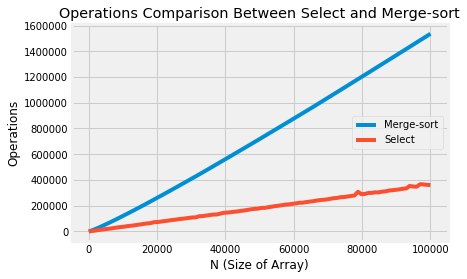

In [26]:
plt.plot(N,merge_sort_avg_ops);  # Plot average ops as a function of N using merge-sort
plt.plot(N,select_avg_ops);  # Plot average ops as a function of N using select
plt.legend(["Merge-sort","Select"],loc="center right");
plt.xlabel("N (Size of Array)");
plt.ylabel("Operations");
plt.title('Operations Comparison Between Select and Merge-sort');

The results above show a larger-scale simulation to compare the number of operations required for merge-sort and select algorithms. Though we haven't explicitely performed a linear or exponential curve fit, it appears from the plot that the select curve is linear, and the merge-sort curve is somewhere between linear and exponential (N*log(N))? 

We can figure out what kind of average complexities the algorithms are by computing C as a function of N for a given complexity (write more info here). If C remains relatively constant as a function of N, then that type of average complexity is correct - otherwise, it's not. We will do this for $N$, $NlogN$, and $N^2$:

If linear complexity:
$C = \dfrac{ops}{N}$

If $N\log(N)$ complexity:
$C = \dfrac{ops}{N\log(N)}$

If $N^2$ complexity:
$C = \dfrac{ops}{N^2}$

Note that $log(C)$ was plotted instead of $C$ - this was done because the C value can be very low and difficult to visualize, especially for the $N^2$ complexity test. If C is constant, then $log(C)$ will also be constant!

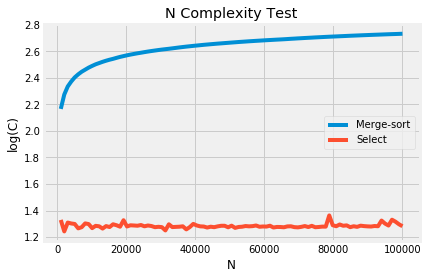

In [43]:
# C if N
c_merge = []
c_select = []
len(merge_sort_avg_ops)
for i in range(len(N)-1):
    c_merge.append(math.log(merge_sort_avg_ops[i+1]/(N[i+1])))
    c_select.append(math.log(select_avg_ops[i+1]/(N[i+1])))
    
plt.plot(N,[None]+c_merge);  # Plot average ops as a function of N using merge-sort
plt.plot(N,[None]+c_select);  # Plot average ops as a function of N using select
plt.legend(["Merge-sort","Select"],loc="center right");
plt.xlabel('N');
plt.ylabel('log(C)');
plt.title('N Complexity Test');

C is constant for the select algorithm.

C is NOT constant for the merge-sort algorithm.

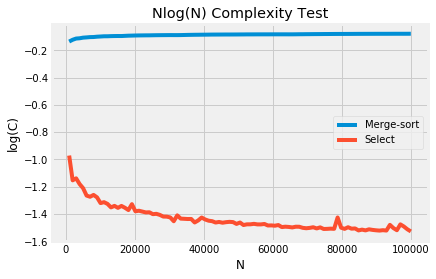

In [44]:
# C if NlogN
c_merge = []
c_select = []
len(merge_sort_avg_ops)
for i in range(len(N)-1):
    c_merge.append(math.log(merge_sort_avg_ops[i+1]/(N[i+1]*math.log2(N[i+1]))))
    c_select.append(math.log(select_avg_ops[i+1]/(N[i+1]*math.log2(N[i+1]))))
    
plt.plot(N,[None]+c_merge);  # Plot average ops as a function of N using merge-sort
plt.plot(N,[None]+c_select);  # Plot average ops as a function of N using select
plt.legend(["Merge-sort","Select"],loc="center right");
plt.xlabel('N');
plt.ylabel('log(C)');
plt.title('Nlog(N) Complexity Test');

C is NOT constant for the select algorithm.

C is constant for the merge-sort algorithm.

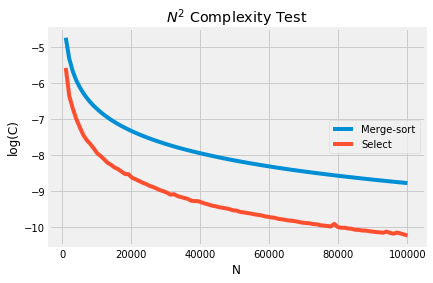

In [46]:
# C if N^2
c_merge = []
c_select = []
len(merge_sort_avg_ops)
for i in range(len(N)-1):
    c_merge.append(math.log(merge_sort_avg_ops[i+1]/(N[i+1]*N[i+1])))
    c_select.append(math.log(select_avg_ops[i+1]/(N[i+1]*N[i+1])))
    
plt.plot(N,[None]+c_merge);  # Plot average ops as a function of N using merge-sort
plt.plot(N,[None]+c_select);  # Plot average ops as a function of N using select
plt.legend(["Merge-sort","Select"],loc="center right");
plt.xlabel('N');
plt.ylabel('log(C)');
plt.title('$N^2$ Complexity Test');

C is NOT constant for the select algorithm.

C is NOT constant for the merge-sort algorithm.

## Discussion

These 3 plots show that the select algorithm likely has N complexity, and the merge-sort has NlogN complexity. I was actually quite surprised with how well this worked - I expected that I would need to average more than 10 randomly generated arrays for each N.

## Inversion Score Experiment

In this experiment, we won't vary the size of the random array (n=1000), however, we will generate 10,000 random arrays with various inversion scores (0 = no inversions, 1 = max inversions). We'll see how the number of inversions affects the required number of operations for both merge-sort and select.

In [123]:
n = 1000
n_runs = 200

all_inversions = []
all_merge_sort_ops = []
all_select_ops = []

for run in range(n_runs):
    rand_array = [1000*random() for p in range(0, n)]  # Generate random array of size N
    inversions = inv_c.count(rand_array,ratio_out=True)
    _,merge_sort_ops = merge_sort.sort(rand_array,out_ops = True)  # Compute merge-sort operations
    _,select_ops = selection.select(rand_array,out_ops = True)  # Compute select operations
    
    all_inversions.append(inversions)
    all_merge_sort_ops.append(merge_sort_ops)
    all_select_ops.append(select_ops)
 

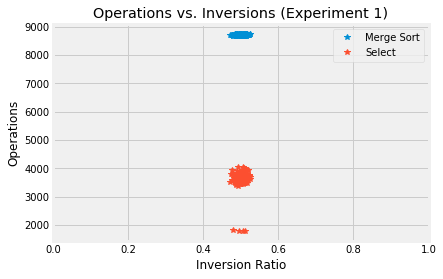

In [124]:
plt.plot(all_inversions,all_merge_sort_ops,'*');
plt.plot(all_inversions,all_select_ops,'*');
plt.legend(['Merge Sort','Select']);
plt.xlabel('Inversion Ratio');
plt.ylabel('Operations');
plt.title('Operations vs. Inversions (Experiment 1)');
plt.xlim([0,1]);

It looks like the number of operations is constant regardless of the number of inversions, however, a closer inspection shows that the inversion ratio is almost always between 0.48 to 0.52 for a randomly generated vector - a really small range. That means we'll have to force the number of inversions to be outside this range.

To do this, we'll concatonate vectors whos values are randomly generated within different ranges. This will let us force our arrays to be within some inversion range. Specifically, we generate 10 subset arrays, where each array exists in some range $[1000i+1000]$, where i is the index of the subset.



In [148]:
n = 20
n_runs = 2000
n_subsets = 10
all_inversions = []
all_merge_sort_ops = []
all_select_ops = []

for run in range(n_runs):
    rand_array = []
    subset = [i for i in range(n_subsets)]
    shuffle(subset)
    for i_subset in subset:
        c_rand_array = [1000*i_subset+1000*random() for p in range(0, n)]
        rand_array = rand_array+c_rand_array

    inversions = inv_c.count(rand_array,ratio_out=True)
    _,merge_sort_ops = merge_sort.sort(rand_array,out_ops = True)  # Compute merge-sort operations
    _,select_ops = selection.select(rand_array,out_ops = True)  # Compute select operations
    
    all_inversions.append(inversions)
    all_merge_sort_ops.append(merge_sort_ops)
    all_select_ops.append(select_ops)

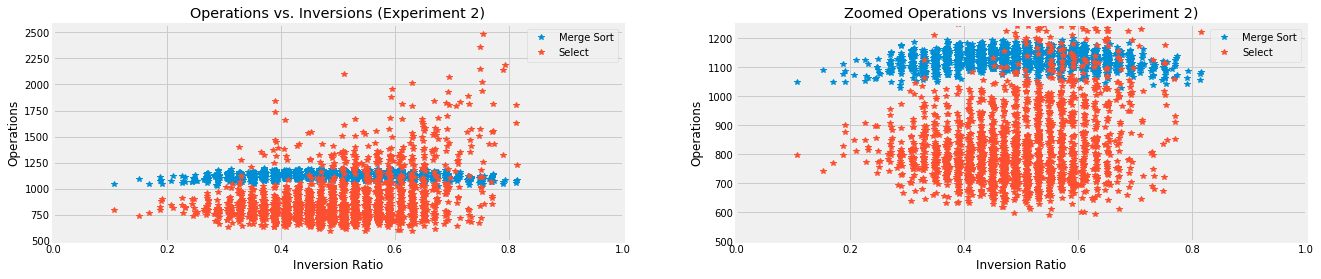

In [147]:
plt.subplots(1, 2, figsize=(20, 4))
plt.subplot(1,2,1)
plt.plot(all_inversions,all_merge_sort_ops,'*');
plt.plot(all_inversions,all_select_ops,'*');
plt.legend(['Merge Sort','Select']);
plt.xlabel('Inversion Ratio');
plt.ylabel('Operations');
plt.title('Operations vs. Inversions (Experiment 2)');
plt.xlim([0,1]);

plt.subplot(1,2,2);
plt.plot(all_inversions,all_merge_sort_ops,'*');
plt.plot(all_inversions,all_select_ops,'*');
plt.legend(['Merge Sort','Select']);
plt.xlabel('Inversion Ratio');
plt.ylabel('Operations');
plt.title('Zoomed Operations vs Inversions (Experiment 2)');

plt.xlim([0,1]);
plt.ylim([500,1250]);

## Discussion

The inversion experiment results are quite interesting! Though the average number of operations is lower for merge-sort than select across most of inversion ratio range, the select algorithm has more high outliers as the number of inversions grows (also higher variance). In fact, all medians computed with the select algorithm for arrays with an inversion ratio higher than 0.8 require more operations than the merge-sort algorithm. Therefore, we can't guarantee that select will actually be faster than merge-sort (especially if the inversion ratio is high).

Interestingly, the number of operations for merge-sort is maximized when the inversion ratio is 0.5 - the function is hyperbolic; the number of operations decreases as the inversion ratio increases when the inversion ratio is higher than 0.5, and the number of operations also decreases as the inversion ratio decreases when the inversion ratio is lower than 0.5. The average number of operatiosn for select appears to be fairly constant until the inversion ratio is high (~>0.6).